In [116]:
'''
Created on 2023-08-15 20:46:36
@author: caitgrasso
'''

'\nCreated on 2023-08-15 20:46:36\n@author: caitgrasso\n'

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr, linregress
import os

In [65]:
plt.rcParams.update({'font.size': 10, 'font.family': 'serif'})

In [66]:
BOT = 'bot_04'

# Load FC matrices
fc_before = np.loadtxt('../network_inference_data/fc_matrices/{}_before_mimat_w.csv'.format(BOT), delimiter=',')
fc_after = np.loadtxt('../network_inference_data/fc_matrices/{}_after_mimat_w.csv'.format(BOT), delimiter=',')

# Load distance matrices 
sc_before = np.loadtxt('../spatial_data/distance_matrices/distmat_{}_before_centroids.csv'.format(BOT), delimiter=',')
sc_after = np.loadtxt('../spatial_data/distance_matrices/distmat_{}_after_centroids.csv'.format(BOT), delimiter=',')


In [67]:
# Get unique edges because the FC and SC mats are symmetric
fc_edges_before = fc_before[np.triu_indices(fc_before.shape[0],k=1)]
fc_edges_after = fc_after[np.triu_indices(fc_after.shape[0],k=1)]

sc_edges_after = sc_after[np.triu_indices(sc_after.shape[0],k=1)]
sc_edges_before = sc_before[np.triu_indices(sc_before.shape[0],k=1)]

# Remove edges with 0 functional connectivity
fc_edges_before_pruned = fc_edges_before[fc_edges_before!=0]
fc_edges_after_pruned = fc_edges_after[fc_edges_after!=0]

sc_edges_after_pruned = sc_edges_after[fc_edges_after!=0]
sc_edges_before_pruned = sc_edges_before[fc_edges_before!=0]

# Take log
log_sc_before = np.log10(sc_edges_before_pruned)
log_fc_before = np.log10(fc_edges_before_pruned)

log_sc_after = np.log10(sc_edges_after_pruned)
log_fc_after = np.log10(fc_edges_after_pruned)

Before: -0.30292169157782334 3.091021861248876e-66
After: -0.19747371639272548 9.059807108214267e-26


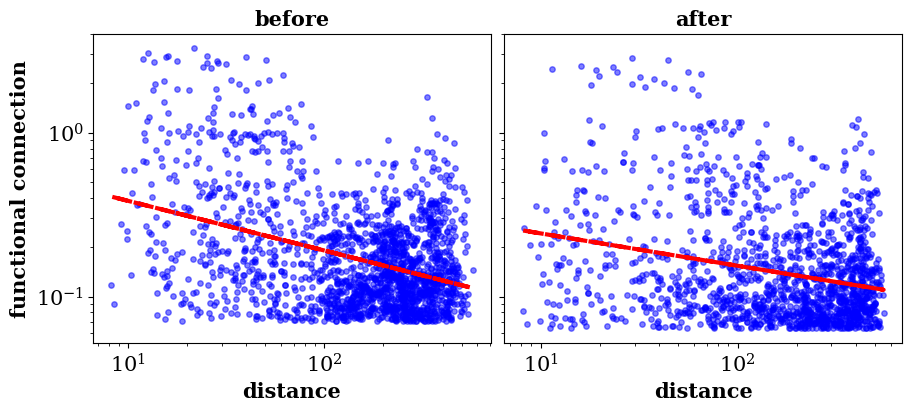

In [68]:
fig, ax = plt.subplots(1,2, figsize=(9,4), layout="constrained", sharey=True)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].scatter(sc_edges_before_pruned, fc_edges_before_pruned, c='blue', s=15, alpha=0.5)
ax[1].scatter(sc_edges_after_pruned, fc_edges_after_pruned, c='blue', s=15, alpha=0.5)

# Linear regression

# Before
m,b,rvalue,pvalue, stderr = linregress(log_sc_before, log_fc_before)
print('Before:', m, pvalue)

y_pred = b + m*log_sc_before

ax[0].plot(10**log_sc_before, 10**y_pred, 'r--', linewidth=3)

# After
m,b,rvalue,pvalue, stderr = linregress(log_sc_after, log_fc_after)
print('After:', m, pvalue)

y_pred = b + m*log_sc_after

ax[1].plot(10**log_sc_after, 10**y_pred, 'r--', linewidth=3)

ax[0].set_ylabel('functional connection', fontweight='bold', fontsize=15)
ax[0].set_xlabel('distance', fontweight='bold', fontsize=15)

ax[1].set_xlabel('distance', fontweight='bold', fontsize=15)

ax[0].set_title('before', fontweight='bold', fontsize=15)
ax[1].set_title('after', fontweight='bold', fontsize=15)

ax[0].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)

os.makedirs('../results/fc_distance_plots/',exist_ok=True)
plt.savefig(f'../results/fc_distance_plots/{BOT}_fc_distance_scatter_spearman.png', dpi=300, bbox_inches='tight')
plt.show()